In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import time

In [22]:
N = 5120
dx = 0.1
dt = 0.1
L = N*dx

In [3]:
ttitle = "Lattice points = "+str(N)+" dx = "+str(dx)+"\n"
#ttitle = ttitle + "dt = "+str(dt)+"\n"
ttitle = ttitle + "dt = 0.01 until t=20; Then dt = 0.1\n"
ttitle = ttitle + "$C(t) = C0 + A\sin(2\pi t/T)$\n"
#ttitle = ttitle + "A = "+str(A)+"; T = "+str(T)

### $\ell(t)$ is the wave-lenght associated to the average momentum $<q^2>$

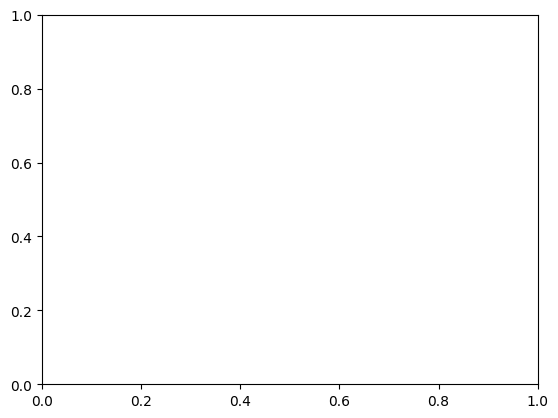

In [23]:
fig, ax = plt.subplots();

/tmp/ipykernel_5290/1923298672.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  lam[i] = 2*np.pi/np.sqrt(q2[i])


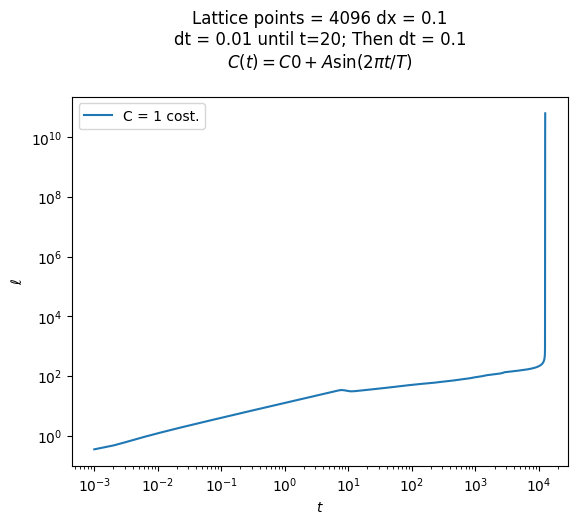

In [24]:
dir_save = "25_06_A/"
dir = "../.saves/" + dir_save
Cbar = 0
A = 1
T = 20


f = open(dir + "fileQ2.dat", "r")

t_init = 0
nloops = 10000000
tt = np.zeros(nloops)
q2 = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a) + t_init
    q2[i] = float(b)
    lam[i] = 2*np.pi/np.sqrt(q2[i])
    i = i + 1
tt = tt[0:i]
q2 = q2[0:i]
lam = lam[0:i]

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_lam = np.log(lam)

ax.set_xscale("log")
ax.set_yscale("log")
#labell = "L = "+str(L)+"; C0 = "+str(Cbar)+"; A = "+str(A)+"; T = "+str(T) 
labell = "Cbar = "+str(Cbar)
labell = labell + "; A = "+str(A)
labell = labell + "; T = "+str(T)
labell = "C = 1 cost."
#labell = "Cbar = "+str(Cbar)+" stepwise"
#ax.plot(log_tt, log_lam,'.',label=labell,ms='5')
ax.plot(tt, lam,'-',label=labell)

ax.set_xlabel("$t$")
ax.set_ylabel("$\ell$")
ax.set_title(ttitle)
#ax.set_xlim(500,510)
ax.legend()
ax.grid()
# Plot fit line
#ax.axvline(np.log(12),color="black",label="change dt=1e-1")
#ax.axvline(np.log(4012),color="gray",label="change dt=5e-1")
#ax.plot(fit_xx, np.log(4*np.pi)*np.ones(len(fit_xx)) + 0.5*fit_xx,'--', label="Fit: $" + str(prefactor) + "\pi \cdot t^{" + str(exponent) + "}$")
#ax.set_xlim(0, 8)
#ax.legend()
ax.grid()

fig

/tmp/ipykernel_5290/3357781151.py:2: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,5000)


Fit region: [23.9124; 1165.0535]
15.087618232106903


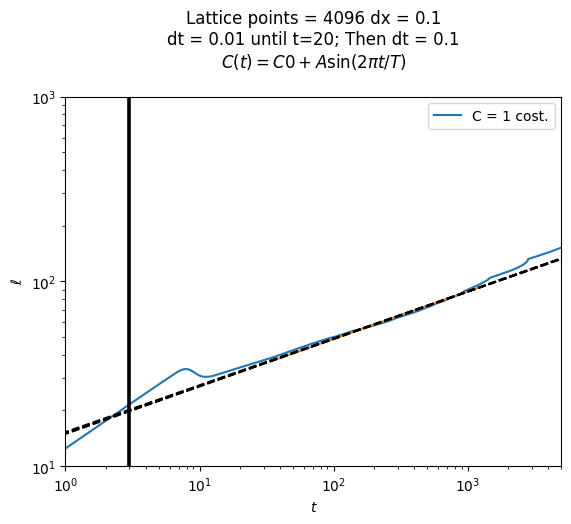

In [57]:
ax.set_title(ttitle)
ax.set_xlim(0,5000)
ax.set_ylim(10,1000)
ax.axvline(np.log(20),color="black")
# FIT
imin = int(1.16*10**4)
imax = int(2.3*10**4)
print("Fit region: ["+str(tt[imin])+"; "+str(tt[imax])+"]")
xfit = log_tt[imin:imax]
yfit = log_lam[imin:imax]
c = np.polyfit(xfit,yfit,deg=1)
fitxx = np.linspace(tt[0],tt[len(tt)-1],1000)
fityy = np.exp(c[1])*np.power(fitxx, c[0])
ax.plot(fitxx,fityy,"--",label="fit",color="black")
print(np.exp(c[1]))
fig

# Cauchy-Croft lenght

The (total) interfaces lenght $\mathcal{L}$ is measured with the Cauchy-Croft formula, by using 3 grids: horizontal, vertical and oblique 45°.

Then, the characteristic lenght $\ell_{C-C}$ is defined as
$$\ell_{C-C}\equiv L^2/\mathcal{L}$$

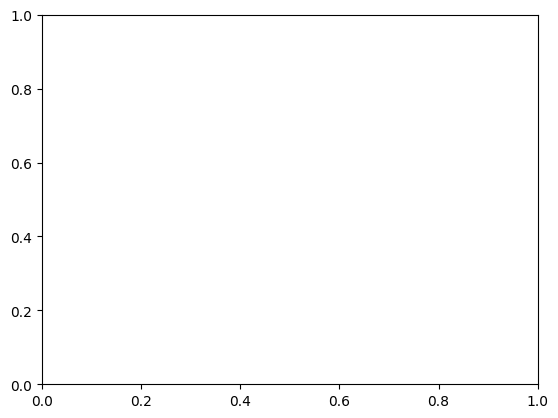

In [18]:
fig, ax = plt.subplots()

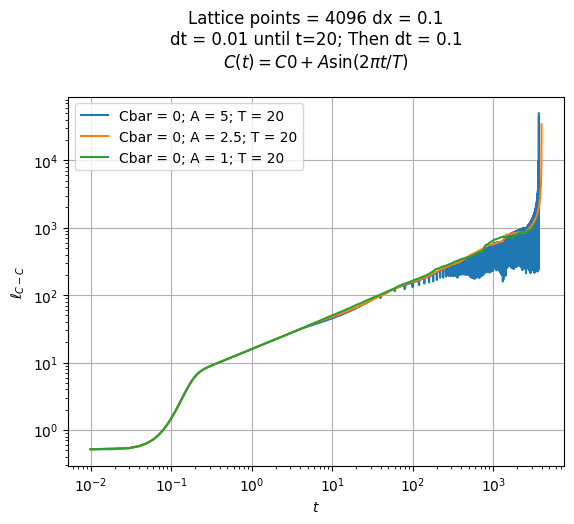

In [21]:
dir_save = "28_10_24_A/"
dir = "../.saves/" + dir_save
Cbar = 0
A = 1
T = 20


f = open(dir + "fileTotlenght.dat", "r")

t_init = 0
nloops = 10000000
tt = np.zeros(nloops)
leng = np.zeros(nloops)
ellCC = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a) + t_init
    leng[i] = float(b)
    ellCC[i] = (L*L)/leng[i]
    i = i + 1
tt = tt[0:i]
leng = leng[0:i]
ellCC = ellCC[0:i]

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_ellCC = np.log(ellCC)

ax.set_xscale("log")
ax.set_yscale("log")
#labell = "L = "+str(L)+"; C0 = "+str(Cbar)+"; A = "+str(A)+"; T = "+str(T) 
labell = "Cbar = "+str(Cbar)
labell = labell + "; A = "+str(A)
labell = labell + "; T = "+str(T)
#labell = "Cbar = "+str(Cbar)+" stepwise"
#ax.plot(log_tt, log_ellCC,'.',label=labell,ms="3")
ax.plot(tt, ellCC,'-',label=labell)
ax.set_xlabel("$t$")
ax.set_ylabel("$\ell_{C-C}$")
#ax.set_xlim(100,110)
ax.set_title(ttitle)
ax.legend()
ax.grid()

# Plot fit line
#ax.axvline(np.log(12),color="black",label="change dt=1e-1")
#ax.axvline(np.log(4012),color="gray",label="change dt=5e-1")
#ax.plot(fit_xx, np.log(4*np.pi)*np.ones(len(fit_xx)) + 0.5*fit_xx,'--', label="Fit: $" + str(prefactor) + "\pi \cdot t^{" + str(exponent) + "}$")
#ax.set_xlim(0, 8)
#ax.legend()
#ax.grid()
fig


6.380630882246644
Fitted exponent: t^0.5036164626928542


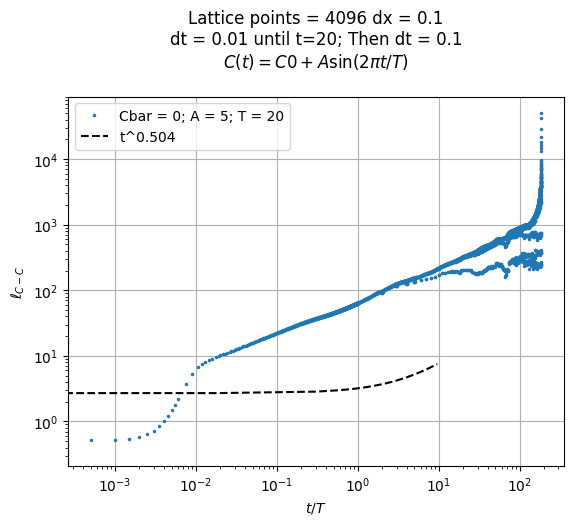

In [10]:
# FIT
imin = 20
imax = int(0.1*len(log_tt))
print(log_tt[imax])

fitxx = np.linspace(min(log_tt),max(log_tt))
log_tt = log_tt[imin:imax]
log_ellDW = log_ellCC[imin:imax]
c = np.polyfit(log_tt, log_ellDW,deg=1)
fityy = c[0]*fitxx+c[1]*np.ones(len(fitxx))
ax.plot(fitxx, fityy, "--", label = "t^"+str(round(c[0],3)),color="black")
ax.legend()
print("Fitted exponent: t^"+str(c[0]))
fig

### $\ell_{DW}(t)$ is the measure of the average size of the domains
To calculate this lenghts, we need to calculate two integrals called $I_1$ and $I_2$ in the thesis' Appendix.
So the following functions "Cfun, Wfun" are defined, as those integrals depend on C(t).
In fact, only one of those integrals has to be calculated and as it measures the thickness of the interface, it is called $W$.
**NOTICE** that _in the Appendix_ an **approximation** is made when we calculate this thickness, as we approximate u in the direction ortogonal to the interface as the 1D stationary state with C=C(t). But this is an approximation good only in the adiabatic (slow C(t)) limit.
While in the fast limit C=C0 is a good approximation and in the meanwhile BOH.


In [11]:
def Cfun(t, Cbar, A, T):
    return Cbar + A*np.sin(2*np.pi*t/T)
def Wfun(t, Cbar, A, T):
    C = Cfun(t, Cbar, A, T)
    return (2*np.sqrt(2)/3*np.power(C,3/2))
C = 1
W = (2*np.sqrt(2)/3*np.power(C,3/2))

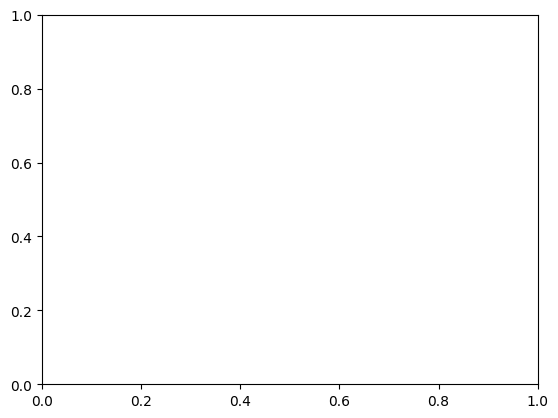

In [12]:
fig_DW, ax_DW = plt.subplots()

In [13]:
f = open(dir + "/fileGrad2.dat", "r")
tt = np.zeros(nloops)
ellDW = np.zeros(nloops)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a) + t_init
    ellDW[i] = float(b)*Wfun(tt[i], Cbar, A, T)
    i = i + 1
tt = tt[0:i]
tspan_title = "\n$t\in$[" + str(tt[0]) + ", " + str(tt[len(tt)-1]) + "]"
ellDW = ellDW[0:i]

# Calc logaritms (we'll plot the log)
log_tt = np.log(tt)
log_ellDW = np.log(ellDW)

ax_DW.set_xscale("linear")
ax_DW.set_yscale("linear")
labell = "Cbar = "+str(Cbar)
#labell = "C = 1 cost."
ax_DW.plot(log_tt, log_ellDW,'*', label=labell)
#title = "$\lambda = L (\int |\\nabla u|^2 dx)^{-1}W(t)$"
ax_DW.set_title(ttitle)
ax_DW.set_xlabel("$\log t$")
ax_DW.set_ylabel("$\log \ell_{DW}$")
ax_DW.legend()
ax_DW.grid()
fig_DW

FileNotFoundError: [Errno 2] No such file or directory: '../.saves/25_10_24_C//fileGrad2.dat'

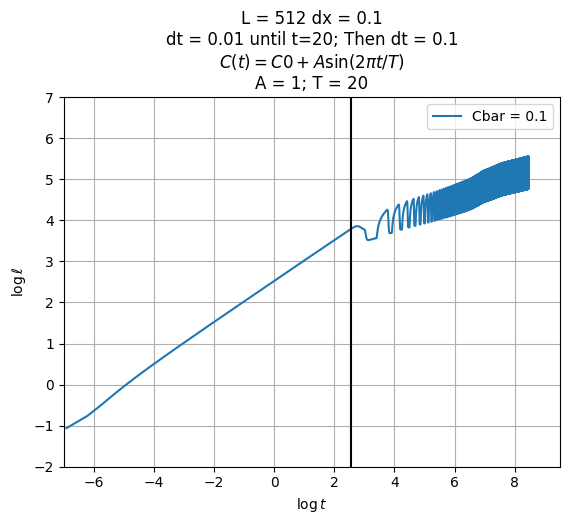

In [13]:
ax.set_yscale("linear")
fig

# Check asymptotic theory
At large times (coarsening established + $\lambda_{DW}>>W\int (1-u^2_{1D})d\xi$)

$$\lambda ^{-2} \simeq [\frac{1}{DW}\int (\partial_{\xi} u_{1D})^2 d\xi] \lambda_{DW}^{-1}$$
where $D=2$ is the dimension and $W$ is the prefactor of the laplacian, that we set $W=1$.

More precisely, when coarsening is established
$$\log \lambda = \frac12\log(\frac{I_1}{DW(2\pi)^2})-\frac12\log(\lambda_{DW}-W\int (1-u^2_{1D})d\xi)$$

/tmp/ipykernel_32881/3417987884.py:8: RuntimeWarning: invalid value encountered in log
  y = -0.5*np.log(prefactor)*np.ones(len(ellDW)-imin-1) + 0.5*np.log(ellDW[imin:len(ellDW)-1] - W*I2*np.ones(len(ellDW)-imin-1))


(0.0, 10.0)

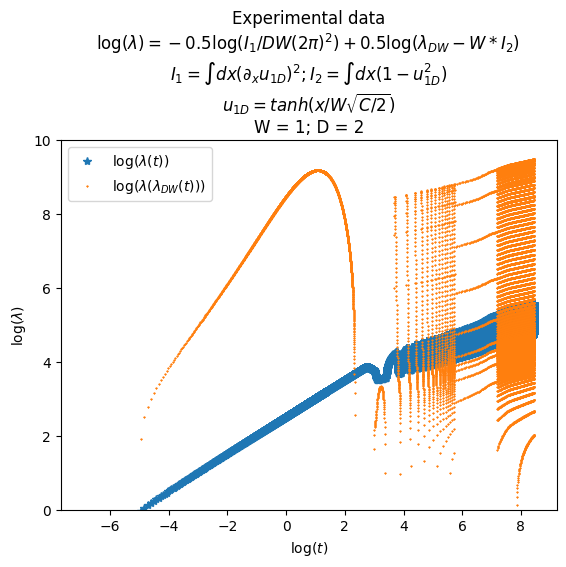

In [14]:
I1 = 2*np.sqrt(2)/3
I2 = 2*np.sqrt(2)
W = 1
D = 2
imin = 2
prefactor = I1/((2*np.pi)**2*W*D)

y = -0.5*np.log(prefactor)*np.ones(len(ellDW)-imin-1) + 0.5*np.log(ellDW[imin:len(ellDW)-1] - W*I2*np.ones(len(ellDW)-imin-1))

f, ax = plt.subplots()
title = "Experimental data\n"
title = title + "$\log(\lambda) = -0.5\log(I_1/DW(2\pi)^2) + 0.5\log(\lambda_{DW}-W*I_2)$ \n"
title = title + "$I_1 = \int dx (\partial_{x} u_{1D})^2; I_2 = \int dx (1-u_{1D}^2)$ \n"
title = title + "$u_{1D} = tanh(x/W\sqrt{C/2})$\n"
title = title + "W = 1; D = 2"
ax.set_xscale("linear")
ax.set_yscale("linear")
ax.plot(log_tt, log_lam,'*', label="$\log(\lambda(t))$")
ax.plot(log_tt[imin:len(ellDW)-1], y,'*', label="$\log(\lambda(\lambda_{DW}(t)))$", ms="1")
ax.set_xlabel("$\log(t)$")
ax.set_ylabel("$\log(\lambda)$")
ax.legend()
ax.set_title(title)
ax.set_ylim(0,10)